Data from the [Aging, Dementia and TBI Study](https://aging.brain-map.org/download/index)

In [3]:
library(tidyverse)

# import data
df = read.csv("DonorInformation.csv")

# drop unnecessary columns 
df <-subset(df, select = -c(age_at_first_tbi, num_tbi_w_loc))

# view df
head(df)
str(df)
summary(df)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


,donor_id,name,age,sex,apo_e4_allele,education_years,longest_loc_duration,cerad,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,326765665,H14.09.078,87,M,N,16,Unknown or N/A,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
2,326765656,H14.09.069,95-99,M,N,17,1-2 min,2,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
3,326765654,H14.09.067,85,M,Y,10,< 10 sec,3,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
4,467056391,H15.09.103,90-94,F,N,11,< 10 sec,0,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
5,309335447,H14.09.010,100+,M,Y,16,Unknown or N/A,3,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
6,309335457,H14.09.020,95-99,F,N,18,Unknown or N/A,2,No Dementia,1,No Dementia,N,Non-white,Not Hispanic,No Dementia,3,2


'data.frame':	107 obs. of  17 variables:
 $ donor_id                 : int  326765665 326765656 326765654 467056391 309335447 309335457 326765676 326765681 326765648 326765657 ...
 $ name                     : chr  "H14.09.078" "H14.09.069" "H14.09.067" "H15.09.103" ...
 $ age                      : chr  "87" "95-99" "85" "90-94" ...
 $ sex                      : chr  "M" "M" "M" "F" ...
 $ apo_e4_allele            : chr  "N" "N" "Y" "N" ...
 $ education_years          : int  16 17 10 11 16 18 12 18 16 16 ...
 $ longest_loc_duration     : chr  "Unknown or N/A" "1-2 min" "< 10 sec" "< 10 sec" ...
 $ cerad                    : int  0 2 3 0 3 2 3 1 1 0 ...
 $ dsm_iv_clinical_diagnosis: chr  "No Dementia" "No Dementia" "Vascular" "No Dementia" ...
 $ control_set              : int  31 26 25 52 28 1 43 46 22 26 ...
 $ nincds_arda_diagnosis    : chr  "No Dementia" "No Dementia" "Dementia, Type Unknown" "No Dementia" ...
 $ ever_tbi_w_loc           : chr  "N" "Y" "Y" "Y" ...
 $ race          

    donor_id             name               age                sex           
 Min.   :309335438   Length:107         Length:107         Length:107        
 1st Qu.:309335464   Class :character   Class :character   Class :character  
 Median :309335493   Mode  :character   Mode  :character   Mode  :character  
 Mean   :326495421                                                           
 3rd Qu.:326765670                                                           
 Max.   :467056409                                                           
 apo_e4_allele      education_years longest_loc_duration     cerad      
 Length:107         Min.   : 6.00   Length:107           Min.   :0.000  
 Class :character   1st Qu.:12.00   Class :character     1st Qu.:1.000  
 Mode  :character   Median :14.00   Mode  :character     Median :1.000  
                    Mean   :14.15                        Mean   :1.477  
                    3rd Qu.:16.00                        3rd Qu.:2.000  
                

In [4]:
# ensure there are no missing values
missing_values_table <- function(df) {
  na <- is.na(df)
  df_na = as.data.frame(na)
  table(df_na)
}
dfna <- missing_values_table(df)
dfna

, , age = FALSE, sex = FALSE, apo_e4_allele = FALSE, education_years = FALSE, longest_loc_duration = FALSE, cerad = FALSE, dsm_iv_clinical_diagnosis = FALSE, control_set = FALSE, nincds_arda_diagnosis = FALSE, ever_tbi_w_loc = FALSE, race = FALSE, hispanic = FALSE, act_demented = FALSE, braak = FALSE, nia_reagan = FALSE

        name
donor_id FALSE
   FALSE   107


In [5]:
# okay turns out there's an easier way to check missing values
colSums(is.na(df))
# check for empty values
colSums(df=='')
colSums(df=='N/A')
# drop rows with N/A
df<-df[!(df$apo_e4_allele=="N/A"),]

df
# now there are 100 rows (note indexes remain)

donor_id                      name                       age 
                        0                         0                         0 
                      sex             apo_e4_allele           education_years 
                        0                         0                         0 
     longest_loc_duration                     cerad dsm_iv_clinical_diagnosis 
                        0                         0                         0 
              control_set     nincds_arda_diagnosis            ever_tbi_w_loc 
                        0                         0                         0 
                     race                  hispanic              act_demented 
                        0                         0                         0 
                    braak                nia_reagan 
                        0                         0

donor_id                      name                       age 
                        0                         0                         0 
                      sex             apo_e4_allele           education_years 
                        0                         0                         0 
     longest_loc_duration                     cerad dsm_iv_clinical_diagnosis 
                        0                         0                         0 
              control_set     nincds_arda_diagnosis            ever_tbi_w_loc 
                        0                         0                         0 
                     race                  hispanic              act_demented 
                        0                         0                         0 
                    braak                nia_reagan 
                        0                         0

donor_id                      name                       age 
                        0                         0                         0 
                      sex             apo_e4_allele           education_years 
                        0                         7                         0 
     longest_loc_duration                     cerad dsm_iv_clinical_diagnosis 
                        0                         0                         0 
              control_set     nincds_arda_diagnosis            ever_tbi_w_loc 
                        0                         0                         0 
                     race                  hispanic              act_demented 
                        0                         0                         0 
                    braak                nia_reagan 
                        0                         0

,donor_id,name,age,sex,apo_e4_allele,education_years,longest_loc_duration,cerad,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,326765665,H14.09.078,87,M,N,16,Unknown or N/A,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
2,326765656,H14.09.069,95-99,M,N,17,1-2 min,2,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
3,326765654,H14.09.067,85,M,Y,10,< 10 sec,3,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
4,467056391,H15.09.103,90-94,F,N,11,< 10 sec,0,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
5,309335447,H14.09.010,100+,M,Y,16,Unknown or N/A,3,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
6,309335457,H14.09.020,95-99,F,N,18,Unknown or N/A,2,No Dementia,1,No Dementia,N,Non-white,Not Hispanic,No Dementia,3,2
8,326765681,H14.09.094,78,M,N,18,Unknown or N/A,1,No Dementia,46,No Dementia,N,White,Not Hispanic,No Dementia,2,1
9,326765648,H14.09.061,89,F,N,16,< 10 sec,1,Multiple Etiologies,22,Possible Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,2,1
10,326765657,H14.09.070,95-99,M,N,16,Unknown or N/A,0,No Dementia,26,No Dementia,N,White,Not Hispanic,No Dementia,2,1


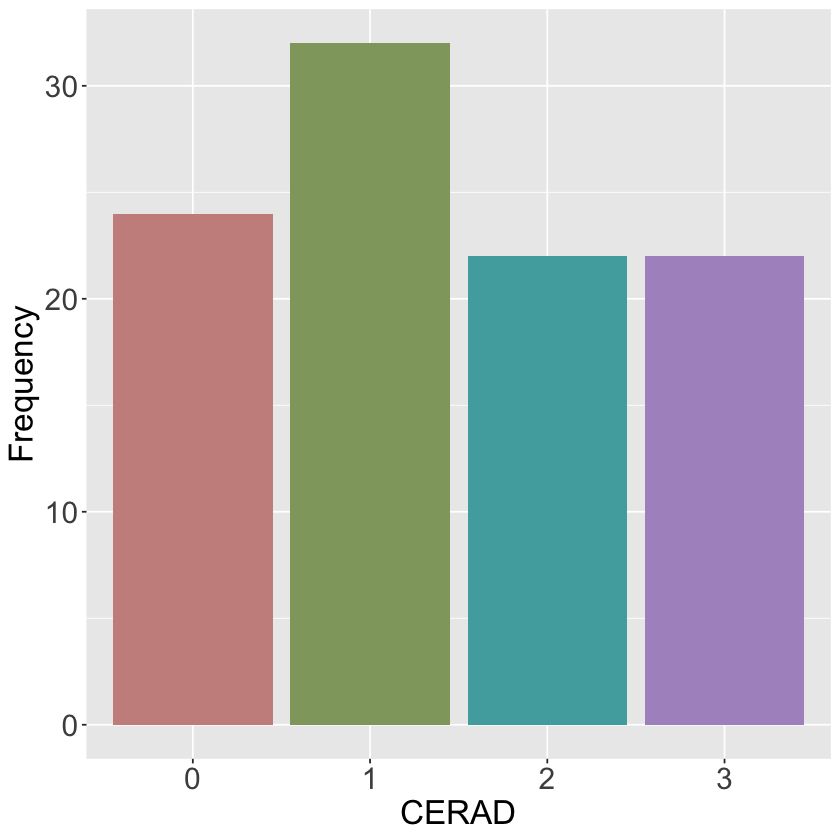

In [6]:
df_cerad <- data.frame(rbind(table(df$cerad)))
ggplot(df, aes(x=as.factor(cerad), fill=as.factor(cerad))) + 
  geom_bar( ) +
  scale_fill_hue(c = 40) +
  labs(y= "Frequency", x = "CERAD") + 
  theme(legend.position="none", axis.text=element_text(size=18), axis.title=element_text(size=20))


In [7]:
# change age ranges into numeric
unique(df$age) # char
df <- mutate(df, age = case_when(age =="100+" ~"100",
                              age=="95-99" ~ "97",
                              age=="90-94" ~ "92",
                              TRUE ~as.character(age)), 
                              age = as.integer(age))
unique(df$cerad)

[1] "87"    "95-99" "85"    "90-94" "100+"  "78"    "89"    "83"    "82"   
[10] "77"    "81"    "88"    "84"    "86"    "79"

[1] 0 2 3 1

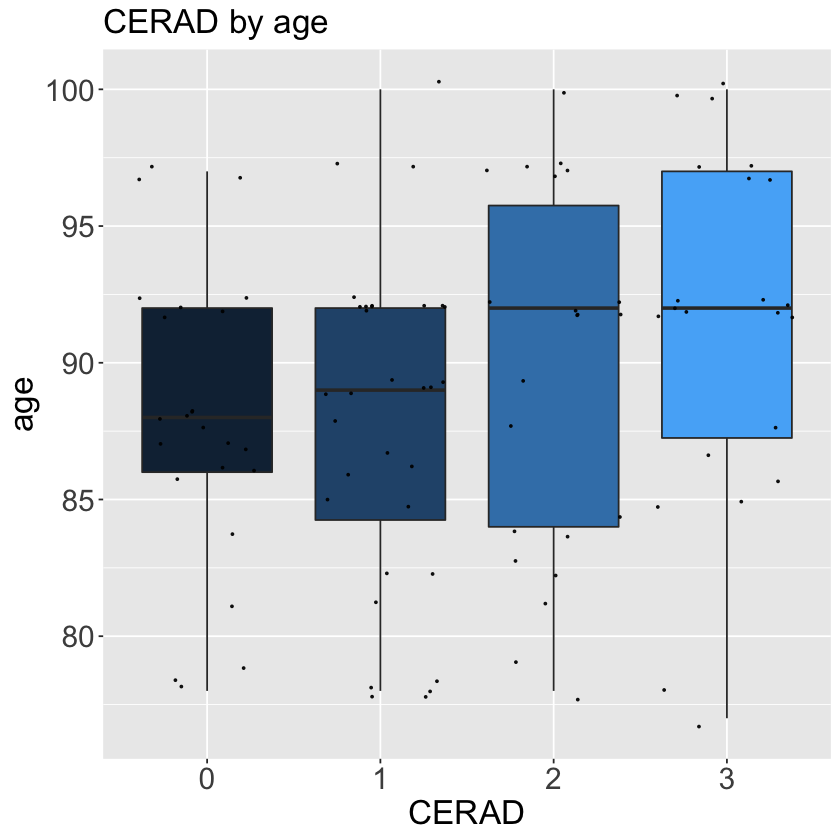

In [8]:
df %>% ggplot(aes(as.factor(cerad), y=age, fill=cerad)) +
    geom_boxplot() +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme(
      legend.position="none",
      plot.title = element_text(size=20),
      axis.text = element_text(size=18), 
      axis.title = element_text(size=20)
    ) +
    ggtitle("CERAD by age") +
    xlab("CERAD")

In [16]:
model <- lm(cerad ~ age, df)
summary(model)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.90471012,1.53862731,-1.237928,0.21870023
age,0.03736889,0.01725234,2.166019,0.03273543


**As standard error and p value is very poor for intercept, age is not a good predictor of CERAD :)**